In [1]:
import pandas as pd

# replace with actual paths to your data
train_data = pd.read_csv('food_train.csv')
test_data = pd.read_csv('food_test.csv')


In [2]:
test_data

,Text,Score
0,I just recently have gone gluten free and miss...,4
1,I had been eying the Popchips brand for some t...,2
2,"Over the last year our so, we've discovered th...",5
3,I'm sorry. It must be that the bacon was almos...,1
4,I'm not a huge fan of spicy foods but I love t...,2
...,...,...
29764,The package promises that avacado oil has nutr...,4
29765,Where r they? Bought the machine and can't fin...,1
29766,Tried these when Amazon had them on sale. Ple...,5
29767,I think that with most of these baby foods it ...,5


In [3]:
# extract text and score from data
X_train = train_data.Text
y_train = train_data.Score
X_test = test_data.Text
y_test = test_data.Score

In [4]:
# transform score from 1-5 to 0-4
y_train = y_train - 1
y_test = y_test - 1
y_train

0         2
1         4
2         1
3         3
4         0
         ..
119071    4
119072    3
119073    2
119074    4
119075    4
Name: Score, Length: 119076, dtype: int64

In [5]:
# Tokenizing text
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(X_train)

X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

2025-04-23 11:22:25.324981: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# Sequence padding
sequence_len = 300
X_train_token = pad_sequences(X_train_token, padding='post', maxlen=sequence_len)
X_test_token = pad_sequences(X_test_token, padding='post', maxlen=sequence_len)

In [8]:
embedding_dim = 250
vocab_size = len(tokenizer.index_word) + 1

# Initialize model
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

2025-04-23 11:22:37.834607: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-04-23 11:22:37.997151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-04-23 11:22:37.998633: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-04-23 11:22:38.000971: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operation

In [9]:
# Set up optimizer and other parameters/settings
model.compile(
    optimizer=tensorflow.keras.optimizers.experimental.AdamW(),
    loss='sparse_categorical_crossentropy',
    metrics=[
        'accuracy'
    ]
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 250)         16538250  
                                                                 
 conv1d (Conv1D)             (None, None, 128)         160128    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               3

In [10]:
# Train
history = model.fit(X_train_token,
                    y_train,
                    epochs=20,
                    validation_split=0.2,
                    batch_size=8,
                    verbose=1)

Epoch 1/20


2025-04-23 11:22:39.841855: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8902
2025-04-23 11:22:40.606667: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x735877d4ed80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-04-23 11:22:40.606693: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA TITAN RTX, Compute Capability 7.5
2025-04-23 11:22:40.636964: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-23 11:22:40.879388: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11908/11908 [==============================] - 198s 16ms/step - loss: 1.2817 - accuracy: 0.4416 - val_loss: 1.0722 - val_accuracy: 0.5484
Epoch 2/20
11908/11908 [==============================] - 140s 12ms/step - loss: 1.1334 - accuracy: 0.5193 - val_loss: 1.0249 - val_accuracy: 0.5719
Epoch 3/20
11908/11908 [==============================] - 141s 12ms/step - loss: 1.0591 - accuracy: 0.5562 - val_loss: 0.9896 - val_accuracy: 0.5974
Epoch 4/20
11908/11908 [==============================] - 137s 12ms/step - loss: 0.9966 - accuracy: 0.5887 - val_loss: 0.9604 - val_accuracy: 0.6125
Epoch 5/20
11908/11908 [==============================] - 138s 12ms/step - loss: 0.9395 - accuracy: 0.6178 - val_loss: 0.9443 - val_accuracy: 0.6181
Epoch 6/20
11908/11908 [==============================] - 136s 11ms/step - loss: 0.8915 - accuracy: 0.6423 - val_loss: 0.9243 - val_accuracy: 0.6330
Epoch 7/20
11908/11908 [==============================] - 139s 12ms/step - loss: 0.8451 - accuracy: 0.6645 - val_loss

In [11]:
# Get model's prediction on test data
y_pred = model.predict(X_test_token)

931/931 [==============================] - 4s 4ms/step


In [12]:
# Peek at prediction
y_pred

array([[8.8171975e-05, 5.0940149e-04, 1.6990084e-02, 8.5274661e-01,
        1.2966584e-01],
       [1.2695273e-02, 9.7994596e-01, 6.7464481e-03, 4.5562134e-04,
        1.5663297e-04],
       [3.9383885e-03, 1.5001566e-02, 1.0765325e-01, 6.8450326e-01,
        1.8890348e-01],
       ...,
       [8.8607349e-06, 2.9584905e-06, 8.7921704e-05, 2.0371325e-02,
        9.7952890e-01],
       [8.4789418e-02, 3.1217036e-01, 2.3368721e-01, 2.2975755e-01,
        1.3959545e-01],
       [2.5518352e-02, 5.4387856e-01, 2.8070349e-01, 1.1117963e-01,
        3.8720019e-02]], dtype=float32)

In [13]:
# Get the prediction based on argmax
import numpy as np
y_pred_classes = np.argmax(y_pred, axis=1)

In [14]:
y_pred_classes

array([3, 1, 3, ..., 4, 1, 1])

In [15]:
# Print classification report
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      5954
           1       0.62      0.60      0.61      5953
           2       0.60      0.62      0.61      5954
           3       0.58      0.60      0.59      5954
           4       0.69      0.67      0.68      5954

    accuracy                           0.64     29769
   macro avg       0.64      0.64      0.64     29769
weighted avg       0.64      0.64      0.64     29769



In [16]:
accuracy_score(y_test, y_pred_classes)

0.6392220094729416

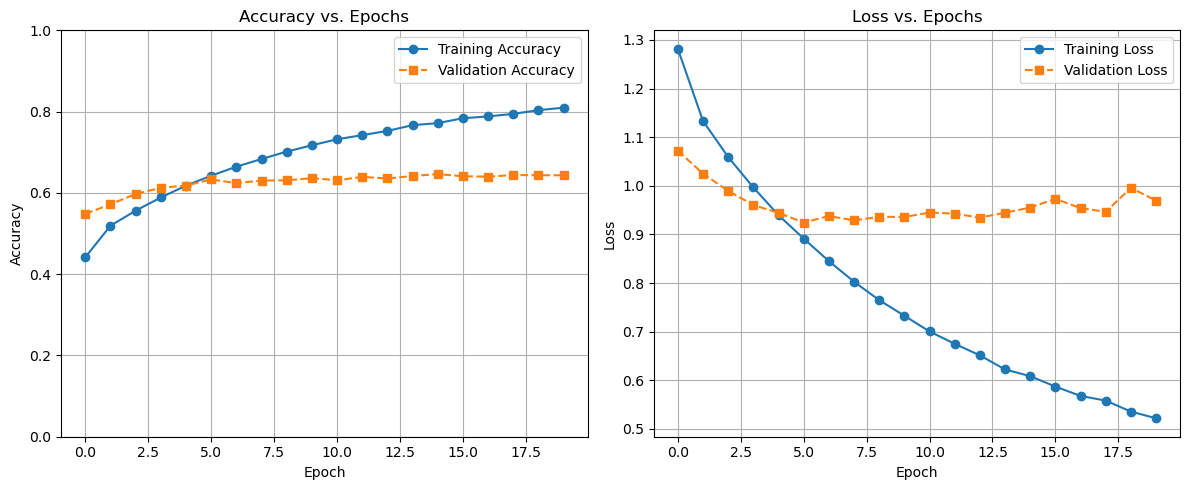

In [17]:
import matplotlib.pyplot as plt

# Get metrics from training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create subplots
plt.figure(figsize=(12, 5))

# accuracy curves
plt.subplot(1, 2, 1)
plt.plot(train_acc, marker='o', label='Training Accuracy')
plt.plot(val_acc, marker='s', linestyle='--', label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # For classification tasks
plt.grid(True)
plt.legend()

# loss curves
plt.subplot(1, 2, 2)
plt.plot(train_loss, marker='o', label='Training Loss')
plt.plot(val_loss, marker='s', linestyle='--', label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


